In [1]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [ ]:
# Provide the correct file path
file_path = r'C:\Users\flore\Desktop\EPFL_part2\MA1\ADA\MovieSummaries'

# Load the data
character_metadata = pd.read_csv(file_path + '\character.metadata.tsv', sep='\t')
movie_metadata = pd.read_csv(file_path + '\movie.metadata.tsv', sep='\t')

# Look through the DataFrames:

print(f'the size of the dataframe is:{character_metadata.shape}') #-- (450668, 13)
print(character_metadata.columns) #need to rename the columns

print(f'the size of the dataframe is:{movie_metadata.shape}') #-- (81740, 9)
print(movie_metadata.columns) #need to rename the columns


the size of the dataframe is:(450668, 13)
Index(['975900', '/m/03vyhn', '2001-08-24', 'Akooshay', '1958-08-26', 'F',
       '1.62', 'Unnamed: 7', 'Wanda De Jesus', '42', '/m/0bgchxw',
       '/m/0bgcj3x', '/m/03wcfv7'],
      dtype='object')
the size of the dataframe is:(81740, 9)
Index(['975900', '/m/03vyhn', 'Ghosts of Mars', '2001-08-24', '14010832',
       '98.0', '{"/m/02h40lc": "English Language"}',
       '{"/m/09c7w0": "United States of America"}',
       '{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}'],
      dtype='object')


In [15]:
# The column titles need to be rename with the name given in the read.me
new_column_names = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_release_date",
    "Character_name",
    "Actor_date_of_birth",
    "Actor_gender",
    "Actor_height_m",
    "Actor_ethnicity",
    "Actor_name",
    "Actor_age_at_movie_release",
    "Freebase_character_actor_map_ID",
    "Freebase_character_ID",
    "Freebase_actor_ID"
]

# Rename the columns by directly setting DataFrame.columns
character_metadata.columns = new_column_names

# The column titles need to be rename with the name given in the read.me
new_column_names = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages",
    "Movie_countries",
    "Movie_genres"
]

# Rename the columns by directly setting DataFrame.columns
movie_metadata.columns = new_column_names


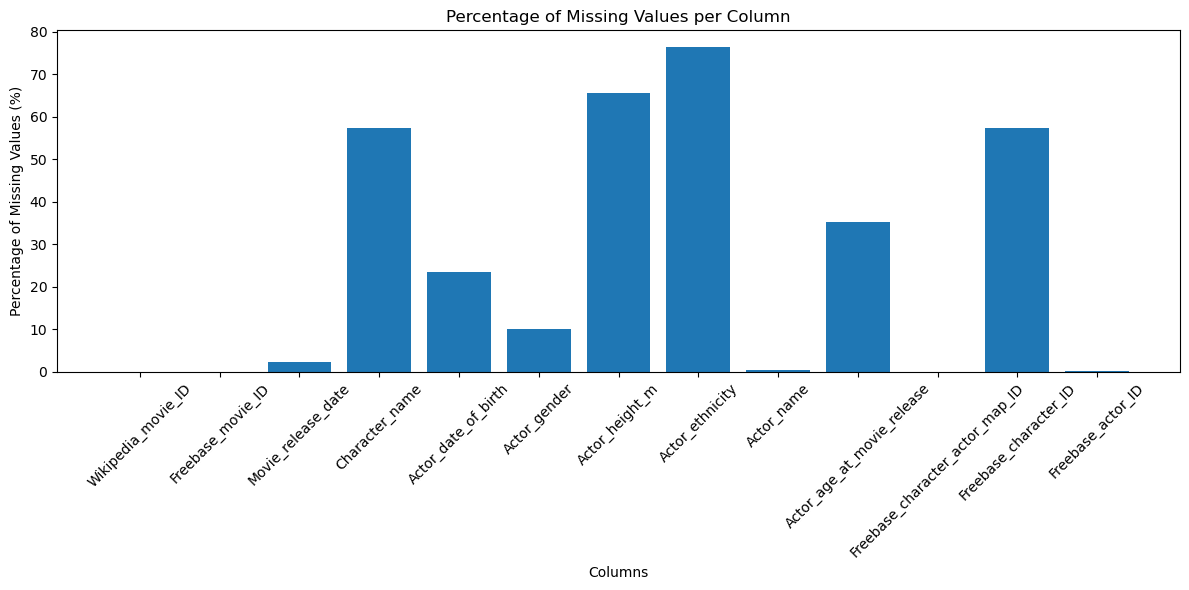

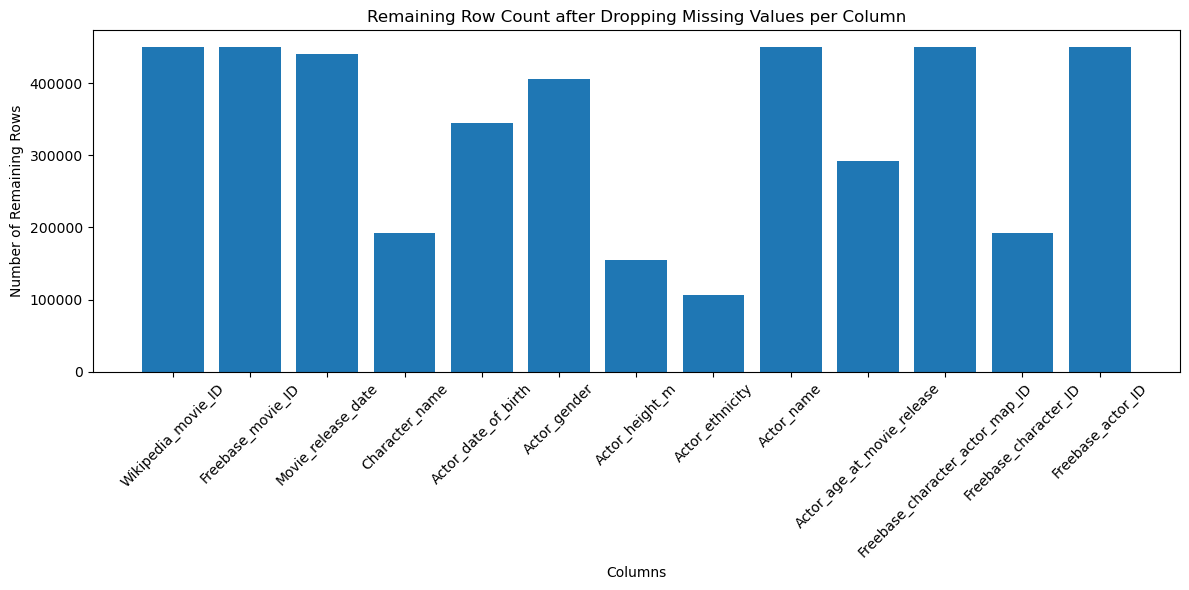

In [6]:
# for th 2 DataFrame, print the count of unique values in each column

# print('Counts for Character Data:\n', character_metadata['Wikipedia_movie_ID'].value_counts(dropna = False),'\n')
# print('Counts for Movie Data:\n', movie_metadata['Wikipedia_movie_ID'].value_counts(dropna = False),'\n')
# --> Logique pour character data on a plusieurs fois le meme movie id qui apparait et pour le movie data on a bien une seul fois chaque id
# --> il y a pas mal de NA pour le character (450680 - 64330 = 386 350) et aucun pour movie ! On a des données sur des personneage dont on a pas les données du film

# print('Counts for Character Data:\n', character_metadata['Character_name'].value_counts(dropna = False),'\n')

# print('Counts for Movie Data:\n', movie_metadata['Freebase_movie_ID'].value_counts(dropna = False),'\n')

# Function to plot the percentage of missing values for each column
def plot_missing_percentage(dataframe):
    missing_percentage = dataframe.isna().mean() * 100  # Calculate the percentage of NaNs

    plt.figure(figsize=(12, 6))
    plt.bar(dataframe.columns, missing_percentage)
    plt.title("Percentage of Missing Values per Column")
    plt.xlabel("Columns")
    plt.ylabel("Percentage of Missing Values (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot the number of rows remaining after dropping missing values per column
def plot_remaining_rows(dataframe):
    remaining_rows = dataframe.apply(lambda col: len(col.dropna()))  # Rows left after dropping NaNs per column

    plt.figure(figsize=(12, 6))
    plt.bar(dataframe.columns, remaining_rows)
    plt.title("Remaining Row Count after Dropping Missing Values per Column")
    plt.xlabel("Columns")
    plt.ylabel("Number of Remaining Rows")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the functions with your DataFrame
plot_missing_percentage(character_metadata)
plot_remaining_rows(character_metadata)



In [ ]:
# Zoom sur les colonnes qui nous interesse : Movies --> (ID, release date, box office revenue)
# Character --> (movie_ID, actor_gender, actor_ethnicity)

columns_to_check = ['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']
remaining_rows = {col: character_metadata[col].dropna().shape[0] for col in columns_to_check}

# Print the results
for col, count in remaining_rows.items():
    print(f"Remaining rows for '{col}': {count}")

filtered_character = character_metadata[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']].dropna(subset=['Actor_ethnicity']) # no missing value remaining in each col

# Display the new filtered DataFrame
print(filtered_character)

Remaining rows for 'Wikipedia_movie_ID': 450668
Remaining rows for 'Movie_release_date': 450668
Remaining rows for 'Actor_ethnicity': 106058
        Wikipedia_movie_ID Movie_release_date Actor_ethnicity
0                   975900               2001      /m/044038p
1                   975900               2001         /m/0x67
4                   975900               2001         /m/0x67
10                  975900               2001       /m/064b9n
26                 3196793               2000         /m/0x67
...                    ...                ...             ...
450626            23687925               1952        /m/0xnvg
450630            30553937               1998       /m/033tf_
450642            12476867               2002        /m/041rx
450643            12476867               2002        /m/041rx
450665            28308153               1957       /m/02w7gg

[106058 rows x 3 columns]


In [12]:
# Clean release date 
filtered_character['Movie_release_date'] = filtered_character['Movie_release_date'].astype(str).str[:4]

# Display the updated DataFrame
print(filtered_character)

        Wikipedia_movie_ID Movie_release_date Actor_ethnicity
0                   975900               2001      /m/044038p
1                   975900               2001         /m/0x67
4                   975900               2001         /m/0x67
10                  975900               2001       /m/064b9n
26                 3196793               2000         /m/0x67
...                    ...                ...             ...
450626            23687925               1952        /m/0xnvg
450630            30553937               1998       /m/033tf_
450642            12476867               2002        /m/041rx
450643            12476867               2002        /m/041rx
450665            28308153               1957       /m/02w7gg

[106058 rows x 3 columns]


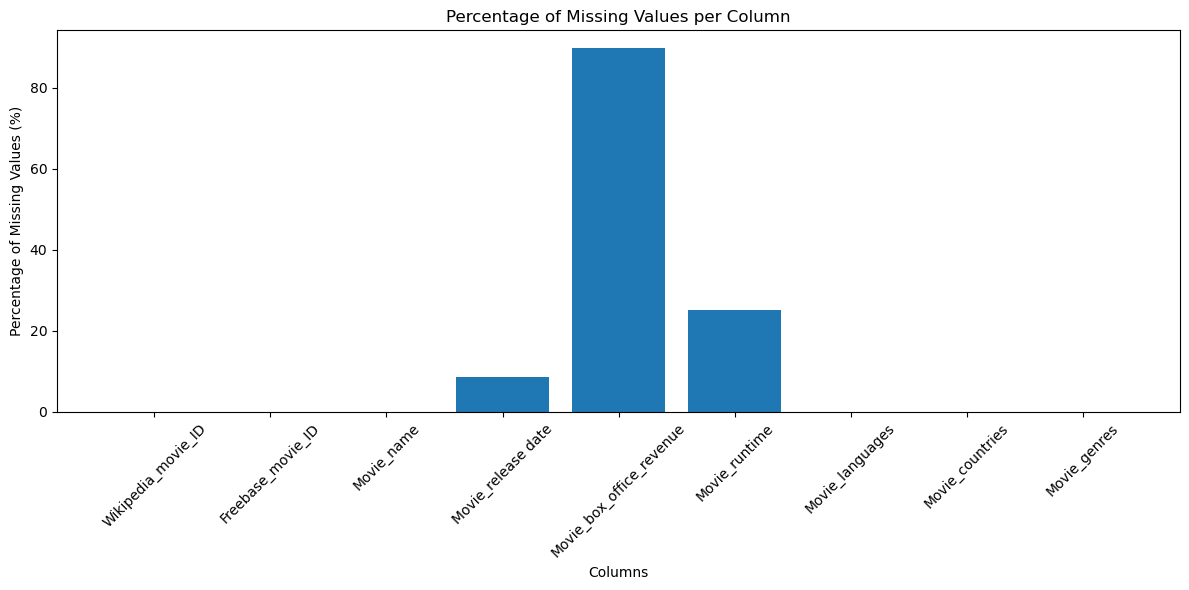

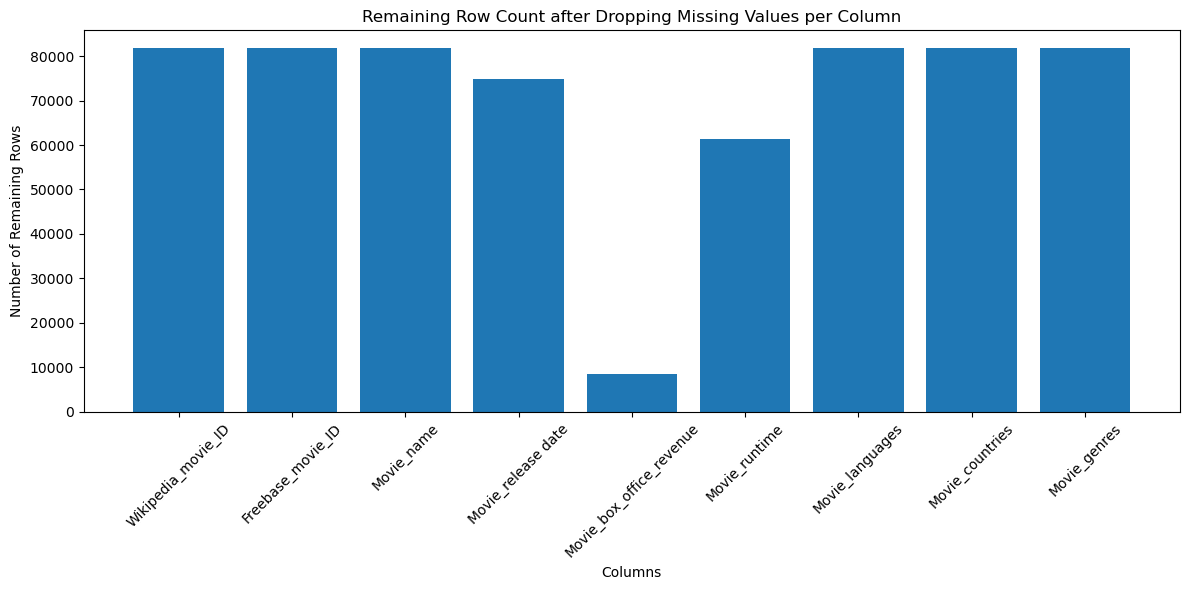

In [ ]:
# Call the functions with Movie Data

plot_missing_percentage(movie_metadata)
plot_remaining_rows(movie_metadata)

In [26]:
# Movie data 

columns_to_check = ['Wikipedia_movie_ID', 'Movie_release_date', 'Movie_box_office_revenue']
remaining_rows = {col: movie_metadata[col].dropna().shape[0] for col in columns_to_check}

# Print the results
for col, count in remaining_rows.items():
    print(f"Remaining rows for '{col}': {count}")


filtered_movie = movie_metadata[['Wikipedia_movie_ID', 'Movie_release_date', 'Movie_box_office_revenue']].dropna(subset=['Movie_box_office_revenue']) # 8400


# Clean release date 
filtered_movie['Movie_release_date'] = filtered_movie['Movie_release_date'].astype(str).str[:4]

# Check the unique types in the 'Movie_box_office_revenue' column
types_in_movie_box_office_revenue = filtered_movie['Movie_box_office_revenue'].map(type).unique()

# Print the result
print("Unique types in 'Movie_box_office_revenue':", types_in_movie_box_office_revenue)


# Display the updated DataFrame
print(filtered_movie)



Remaining rows for 'Wikipedia_movie_ID': 81740
Remaining rows for 'Movie_release_date': 74838
Remaining rows for 'Movie_box_office_revenue': 8400
Unique types in 'Movie_box_office_revenue': [<class 'float'>]
       Wikipedia_movie_ID Movie_release_date  Movie_box_office_revenue
6                10408933               1938                 3600000.0
12                 171005               1989                10161099.0
16                  77856               1964               102272727.0
20                 612710               1999                   21521.0
28                 156558               2001                29381649.0
...                   ...                ...                       ...
81694               54540               1988               288752301.0
81719             7761830               1990                15369573.0
81724             1918494               2000                 6944471.0
81725              664006               1993                22886222.0
81731      

In [35]:
# Assuming your DataFrames are named `filtered_character` and `other_dataframe`
merged_charac_movie_on_ID = filtered_character.merge(filtered_movie, on='Wikipedia_movie_ID', how='inner')

# Display the merged DataFrame
print(merged_charac_movie_on_ID.head())


   Wikipedia_movie_ID Movie_release_date_x Actor_ethnicity  \
0              612710                 1999       /m/0222qb   
1              612710                 1999       /m/01qhm_   
2              156558                 2001         /m/0x67   
3              156558                 2001         /m/0x67   
4              156558                 2001         /m/0x67   

  Movie_release_date_y  Movie_box_office_revenue  
0                 1999                   21521.0  
1                 1999                   21521.0  
2                 2001                29381649.0  
3                 2001                29381649.0  
4                 2001                29381649.0  


In [36]:
# Check if the two columns are identical across all rows
are_columns_identical = merged_charac_movie_on_ID['Movie_release_date_x'].equals(merged_charac_movie_on_ID['Movie_release_date_y'])

# Print the result
print("Are the two columns identical?", are_columns_identical)

# Drop the 'Movie_release_date_y' column
merged_charac_movie_on_ID = merged_charac_movie_on_ID.drop(columns=['Movie_release_date_y'])
merged_charac_movie_on_ID = merged_charac_movie_on_ID.rename(columns={'Movie_release_date_x': 'Movie_release_date'})

# Display the updated DataFrame
print(merged_charac_movie_on_ID.head())



Are the two columns identical? True
   Wikipedia_movie_ID Movie_release_date Actor_ethnicity  \
0              612710               1999       /m/0222qb   
1              612710               1999       /m/01qhm_   
2              156558               2001         /m/0x67   
3              156558               2001         /m/0x67   
4              156558               2001         /m/0x67   

   Movie_box_office_revenue  
0                   21521.0  
1                   21521.0  
2                29381649.0  
3                29381649.0  
4                29381649.0  


In [ ]:
print(merged_charac_movie_on_ID.shape)

merged_charac_movie_on_ID

(31985, 4)


In [ ]:

# Count the number of unique values in 'Actor_ethnicity'
unique_ethnicity_count = merged_charac_movie_on_ID['Actor_ethnicity'].nunique()

# Print the result
print("Number of unique values in 'Actor_ethnicity':", unique_ethnicity_count)

# Steel need to clean it and understand the name or calculate diversity (HOW?)


Number of unique values in 'Actor_ethnicity': 359


In [41]:
# Group by 'Actor_ethnicity' and 'Movie_release_date', then count occurrences
ethnicity_year_counts = merged_charac_movie_on_ID.groupby(['Actor_ethnicity', 'Movie_release_date']).size().unstack(fill_value=0)

# Plot a stacked histogram showing the evolution over release years
ethnicity_year_counts.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Evolution of Actor Ethnicity Over Movie Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count of Movies")
plt.legend(title="Actor Ethnicity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

: 

: 